In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [57]:
import os
files = os.listdir('dataset_albatross')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('dataset_albatross', files[0]))
plt.imread(os.path.join('dataset_albatross', files[0]))

files = [os.path.join('dataset_albatross', file_i)
 for file_i in os.listdir('dataset_albatross')
 if '.jpg' in file_i]

img = plt.imread(files[50])

print(img)

dataset_albatross/Black_Footed_Albatross_0076_417.jpg
[[[ 6  5 11]
  [ 3  2  8]
  [ 1  0  6]
  ...
  [ 1  2  0]
  [ 5  6  0]
  [ 8  9  3]]

 [[ 4  3  9]
  [ 2  1  7]
  [ 0  0  7]
  ...
  [ 1  2  0]
  [ 2  3  0]
  [ 4  5  0]]

 [[ 1  0  6]
  [ 1  0  6]
  [ 0  0  7]
  ...
  [ 4  5  0]
  [ 2  3  0]
  [ 1  2  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


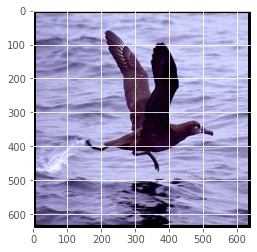

In [93]:
plt.imshow(img)

In [59]:
img.shape

(640, 640, 3)

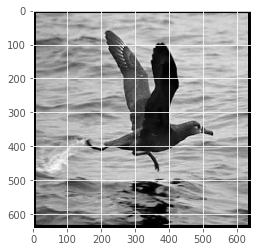

In [60]:
plt.imshow(img[:, :, 0], cmap='gray') # Red Channel

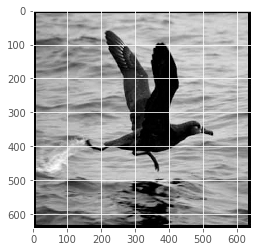

In [61]:
plt.imshow(img[:, :, 1], cmap='gray') # Green Channel

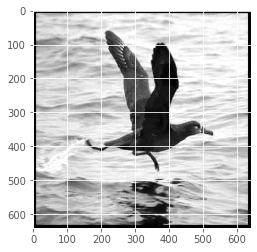

In [62]:
plt.imshow(img[:, :, 2], cmap='gray') # Blue Channel

In [63]:
imgs = [plt.imread(files[file_i])
        for file_i in range(60)]

#imgs = utils.get_celeb_imgs() # nope nope nope

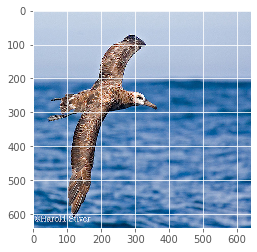

In [64]:
plt.imshow(imgs[1])

In [65]:
imgs[0].shape

(640, 640, 3)

In [66]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)

(60, 640, 640, 3)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


look at this average albatross…where did it go?


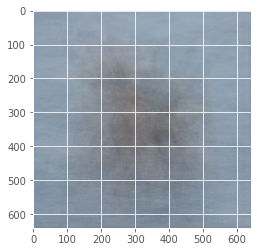

In [90]:
mean_img = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img.astype(np.uint8))
print("look at this average albatross…where did it go?")

This is the first step towards building our robot overlords.  We've reduced down our entire dataset to a single representation which describes what most of our dataset looks like.  There is one other very useful statistic which we can look at very easily:

This is the standard deviation - the variance of the mean


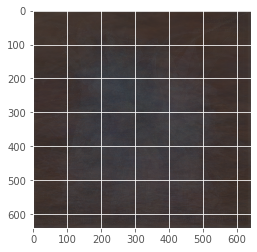

In [68]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))

Mean of all colour channels


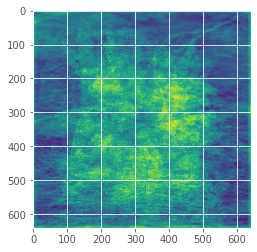

In [69]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8)) # Mean of all colour channels
print("Mean of all colour channels")

Text(0.5, 1.0, '(img - mean) distribution')

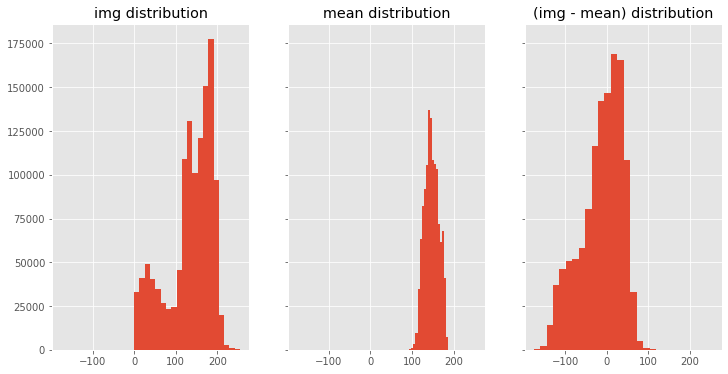

In [73]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

Text(0.5, 1.0, '((img - mean) / std_dev) distribution')

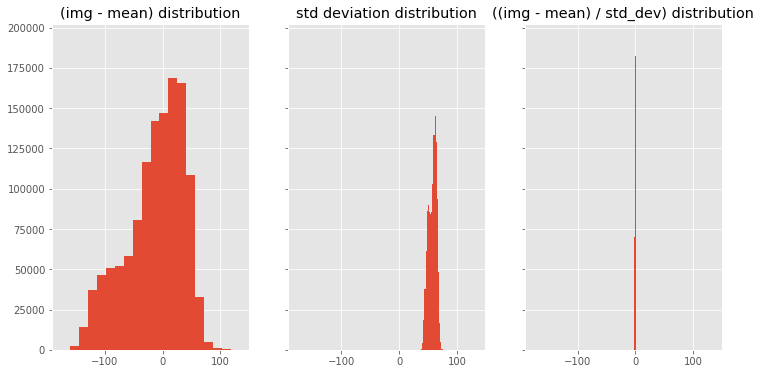

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')